In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=22)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [7]:
! ls ../data

mles_embeddings.pickle		     rtd_embeddings.pickle  test_ids.csv
nsp_embeddings.pickle		     rtd_finetuning_scores  test_trx.parquet
nsp_finetuning_scores		     sop_embeddings.pickle  train.csv
rosbank-ml-contest-boosters.pro.zip  test.csv		    train_trx.parquet


In [9]:
train_target = pd.read_csv('../data/train.csv')[['cl_id', 'target_flag']]
train_target['cl_id'] = train_target['cl_id'].astype(str)
train_target.head(5)

,cl_id,target_flag
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [11]:
df_vectors = pd.read_pickle('../data/mles_embeddings.pickle').set_index('cl_id')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('cl_id'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v1015,v1016,v1017,v1018,v1019,v1020,v1021,v1022,v1023,target_flag
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.011779,-0.005365,0.000608,-0.080256,0.000316,0.003787,-0.082441,-0.000483,-0.009915,0.002162,...,0.002361,0.005663,0.012381,0.002379,-0.001936,0.014633,0.000131,-0.001086,-0.020622,0
0,0.011779,-0.005365,0.000608,-0.080256,0.000316,0.003787,-0.082441,-0.000483,-0.009915,0.002162,...,0.002361,0.005663,0.012381,0.002379,-0.001936,0.014633,0.000131,-0.001086,-0.020622,0
0,0.011779,-0.005365,0.000608,-0.080256,0.000316,0.003787,-0.082441,-0.000483,-0.009915,0.002162,...,0.002361,0.005663,0.012381,0.002379,-0.001936,0.014633,0.000131,-0.001086,-0.020622,0
0,0.011779,-0.005365,0.000608,-0.080256,0.000316,0.003787,-0.082441,-0.000483,-0.009915,0.002162,...,0.002361,0.005663,0.012381,0.002379,-0.001936,0.014633,0.000131,-0.001086,-0.020622,0
0,0.011779,-0.005365,0.000608,-0.080256,0.000316,0.003787,-0.082441,-0.000483,-0.009915,0.002162,...,0.002361,0.005663,0.012381,0.002379,-0.001936,0.014633,0.000131,-0.001086,-0.020622,0


In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [18]:
df_pca = df_vectors.copy()

In [19]:
pca = PCA(n_components=32)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.8316548307240945

In [24]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]

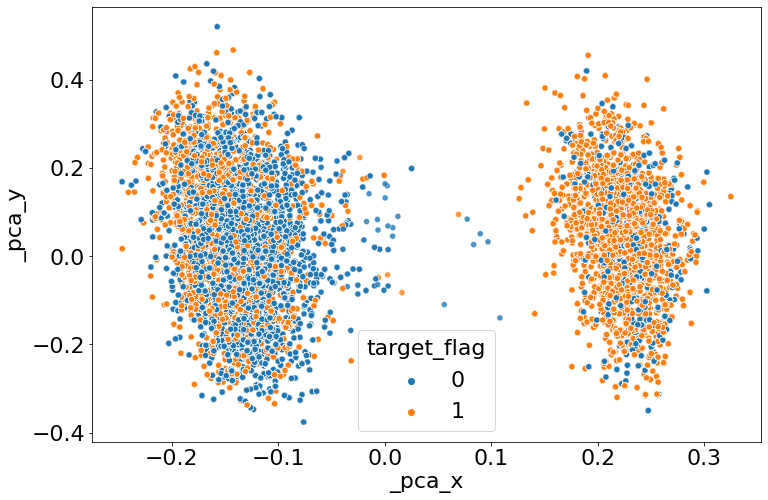

In [25]:
_, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(
    x='_pca_x', y='_pca_y',
    hue='target_flag',
    # style='bins',
    data=df_pca,
    palette='tab10',
    alpha=0.8,
    ax=axs
)
plt.show()

In [26]:
if len(df_pca) > 40000:
    df_tsne = df_pca.sample(n=40000).copy()
else:
    df_tsne = df_pca.copy()

In [34]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300, metric='cosine', perplexity=60.)
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.027s...
[t-SNE] Computed neighbors for 40000 samples in 32.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for s

In [35]:
df_tsne['tSNE[0]'] = tsne_results[:, 0]
df_tsne['tSNE[1]'] = tsne_results[:, 1]

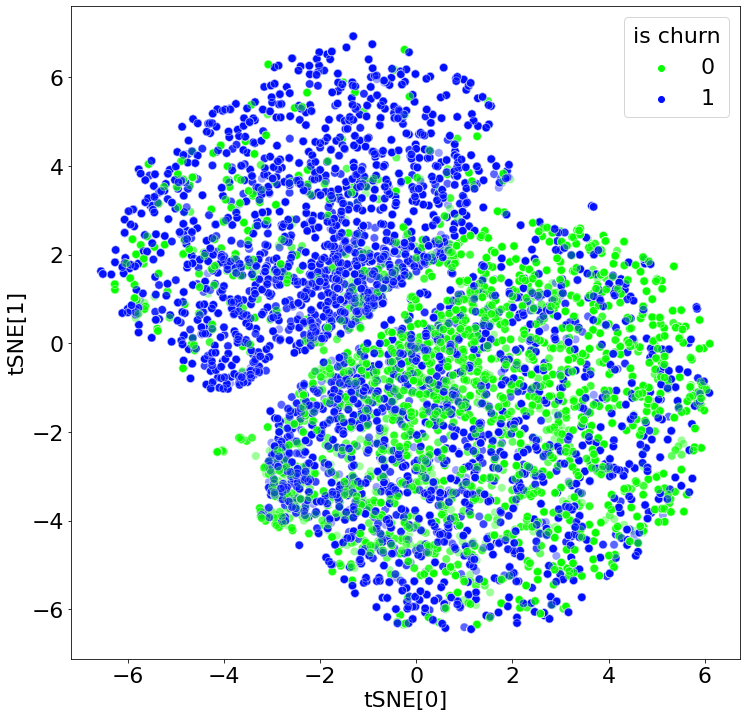

In [36]:
_, axs = plt.subplots(1, 1, figsize=(12, 12))
sns.scatterplot(
    x='tSNE[0]', y='tSNE[1]',
    hue='is churn',
    data=df_tsne.rename(columns={'target_flag': 'is churn'}),
    palette='hsv',
    alpha=0.4, s=70,  
    ax=axs,
)
# plt.show()

plt.savefig('iclr-churn-tsne.pdf')